In [1]:
# Download the zip file
!wget https://confrecordings.ams3.digitaloceanspaces.com/Traffic-Sign-Classification-master.zip

# Unzip the downloaded file
!unzip Traffic-Sign-Classification-master.zip

Streaming output truncated to the last 5000 lines.
 extracting: Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/5/00005_00053_00017.png  
 extracting: Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/5/00005_00053_00018.png  
 extracting: Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/5/00005_00053_00019.png  
 extracting: Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/5/00005_00053_00020.png  
 extracting: Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/5/00005_00053_00021.png  
 extracting: Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/5/00005_00053_00022.png  
 extracting: Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/5/00005_00053_00023.png  
 extracting

In [2]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('/content/Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [4]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [6]:
# Training the Model

history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
981/981 [==============================] - 161s 163ms/step - loss: 1.9304 - accuracy: 0.5001 - val_loss: 0.5794 - val_accuracy: 0.8624
Epoch 2/2
981/981 [==============================] - 157s 160ms/step - loss: 0.8127 - accuracy: 0.7623 - val_loss: 0.2685 - val_accuracy: 0.9227


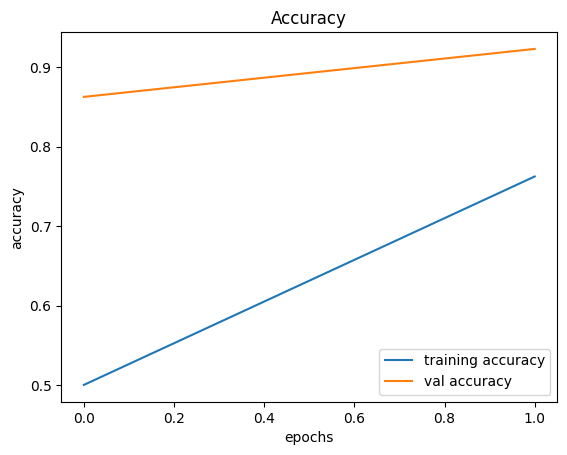

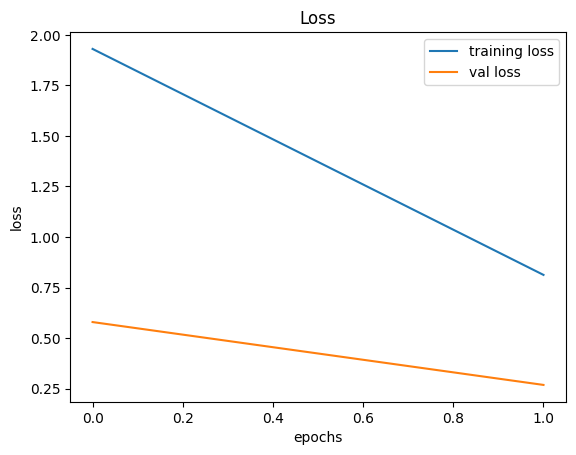

In [7]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
# Saving the Model
model.save('traffic_classifier.h5')

(30, 29)
(30, 30)
4


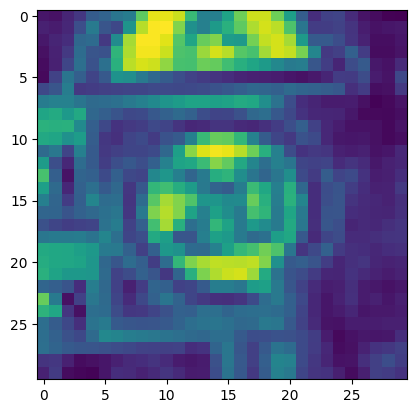

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
#class_labels = list(map_characters.values())
filename='/content/Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/0/00000_00000_00000.png'
img = cv2.imread(filename,0)
print(img.shape)
img = cv2.resize(img, (30, 30))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

p = img.reshape(1, 30, 30, 1)

predicted_class_name = class_names[predicted_class]
print(predicted_class)

1/1 [==============================] - 0s 92ms/step


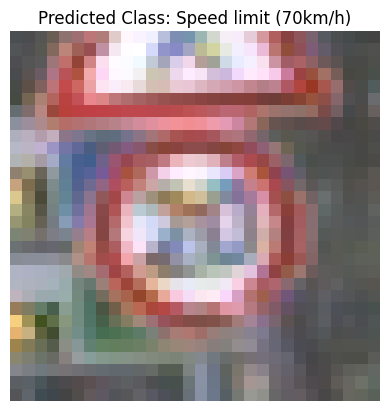

In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model('traffic_classifier.h5')

# Load the new image for prediction
new_image_path='/content/Traffic-Sign-Classification-master/TRAFFIC SIGN CLASSIFIER DATA/traffic sign recognition/Train/0/00000_00000_00000.png'
new_image = Image.open(new_image_path)
new_image = new_image.resize((30, 30))  # Resize the image to match the input size of the model
new_image = np.array(new_image)

# Perform prediction on the new image
predictions = model.predict(np.expand_dims(new_image, axis=0))

# Get the class with the highest probability (predicted class)
predicted_class = np.argmax(predictions)

# Define class names for all 43 classes
class_names = [
    'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)',
    'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)',
    'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)',
    'No passing', 'No passing for vehicles over 3.5 metric tons',
    'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop',
    'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry',
    'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right',
    'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
    'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing',
    'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits',
    'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right',
    'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing',
    'End of no passing by vehicles over 3.5 metric tons'
]

# Get the predicted class name
predicted_class_name = class_names[predicted_class]

# Display the new image
plt.imshow(new_image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()


# Traffic Sign Prediction

## Please upload the traffic sign

FileUpload(value={}, description='Upload Sign Image')

## Please click on the submit button

Button(description='Check', style=ButtonStyle())

Output()

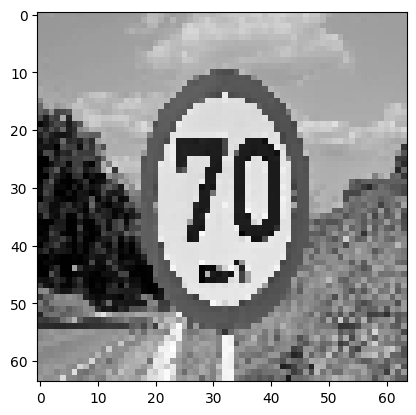

In [18]:
import ipywidgets as widgets
from IPython.display import display, Markdown
import io
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create UI elements
project_name = Markdown('# Traffic Sign Prediction')
up_btn = Markdown('## Please upload the traffic sign')
upload_button = widgets.FileUpload(description='Upload Sign Image')
cl_btn = Markdown('## Please click on the submit button')
submit_button = widgets.Button(description='Check')
output = widgets.Output()

# Define submit button click event handler
def on_submit_button_click(button):
  with output:
    if upload_button.value:
      # Check if any files were uploaded
      uploaded_files = list(upload_button.value.values())
      if uploaded_files:
        # Read the first uploaded image
        image_bytes = uploaded_files[0]['content']
        image = Image.open(io.BytesIO(image_bytes))
        img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

        img = cv2.resize(img, (64, 64))
        img = img / 255.0
        plt.imshow(img, cmap='gray')
        p = img.reshape(1, 64, 64, 1)
        predicted_class_name = class_names[predicted_class]# Replace with your class_labels
        print('Predicted label:', predicted_class_name)

# Assign event handler to the submit button
submit_button.on_click(on_submit_button_click)

# Display UI elements
display(project_name)
display(up_btn)
display(upload_button)
display(cl_btn)
display(submit_button)
display(output)